In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
base = pd.read_csv('../../data/base poluicao china/poluicao.csv')

In [3]:
len(base)

43824

In [4]:
base = base.dropna()

In [5]:
len(base)

41757

In [6]:
base[:3]

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0


In [7]:
base = base.drop(['No', 'year', 'month', 'day', 'hour', 'cbwd'], axis=1)

In [8]:
base[:5]

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
24,129.0,-16,-4.0,1020.0,1.79,0,0
25,148.0,-15,-4.0,1020.0,2.68,0,0
26,159.0,-11,-5.0,1021.0,3.57,0,0
27,181.0,-7,-5.0,1022.0,5.36,1,0
28,138.0,-7,-5.0,1022.0,6.25,2,0


In [9]:
base_treinamento = base.iloc[:, 1:7].values

In [15]:
base_treinamento

array([[ -16.  ,   -4.  , 1020.  ,    1.79,    0.  ,    0.  ],
       [ -15.  ,   -4.  , 1020.  ,    2.68,    0.  ,    0.  ],
       [ -11.  ,   -5.  , 1021.  ,    3.57,    0.  ,    0.  ],
       ...,
       [ -22.  ,   -3.  , 1034.  ,  242.7 ,    0.  ,    0.  ],
       [ -22.  ,   -4.  , 1034.  ,  246.72,    0.  ,    0.  ],
       [ -21.  ,   -3.  , 1034.  ,  249.85,    0.  ,    0.  ]])

In [16]:
poluicao = base.iloc[:,0].values

In [17]:
len(base_treinamento)

41757

In [18]:
base_treinamento.shape

(41757, 6)

#### Normalizar os dados

In [19]:
normalizador = MinMaxScaler(feature_range=(0,1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)

In [20]:
poluicao = poluicao.reshape(-1,1)
poluicao_normalizada = normalizador.fit_transform(poluicao)

#### Formar base de dados de forma a utilizar os 10 registros anteriores para se prever o proximo valor

In [22]:
previsores = []
poluicao_real = []
for i in range(10, 41757):
    previsores.append(base_treinamento_normalizada[i-10:i, 0:6])
    poluicao_real.append(poluicao_normalizada[i, 0])
previsores, poluicao_real = np.array(previsores), np.array(poluicao_real)

In [23]:
previsores.shape

(41747, 10, 6)

#### Estrutura da rede neural recorrente

In [25]:
regressor = Sequential()

regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (previsores.shape[1], 6)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units = 1, activation = 'linear'))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [26]:
regressor.fit(previsores,poluicao_real, epochs = 100, batch_size=64, use_multiprocessing=True)

Epoch 1/100
41747/41747 [==============================] - 50s 1ms/step - loss: 0.0074 - mean_absolute_error: 0.0625
Epoch 2/100
41747/41747 [==============================] - 48s 1ms/step - loss: 0.0062 - mean_absolute_error: 0.0564
Epoch 3/100
41747/41747 [==============================] - 60s 1ms/step - loss: 0.0057 - mean_absolute_error: 0.0535
Epoch 4/100
41747/41747 [==============================] - 68s 2ms/step - loss: 0.0055 - mean_absolute_error: 0.0525
Epoch 5/100
41747/41747 [==============================] - 66s 2ms/step - loss: 0.0054 - mean_absolute_error: 0.0518
Epoch 6/100
41747/41747 [==============================] - 59s 1ms/step - loss: 0.0053 - mean_absolute_error: 0.0514
Epoch 7/100
41747/41747 [==============================] - 59s 1ms/step - loss: 0.0052 - mean_absolute_error: 0.0508
Epoch 8/100
41747/41747 [==============================] - 69s 2ms/step - loss: 0.0052 - mean_absolute_error: 0.0506
Epoch 9/100
41747/41747 [==============================] - 55s 1

41747/41747 [==============================] - 45s 1ms/step - loss: 0.0036 - mean_absolute_error: 0.0414
Epoch 71/100
41747/41747 [==============================] - 47s 1ms/step - loss: 0.0035 - mean_absolute_error: 0.0410
Epoch 72/100
41747/41747 [==============================] - 49s 1ms/step - loss: 0.0035 - mean_absolute_error: 0.0409
Epoch 73/100
41747/41747 [==============================] - 45s 1ms/step - loss: 0.0035 - mean_absolute_error: 0.0410
Epoch 74/100
41747/41747 [==============================] - 47s 1ms/step - loss: 0.0035 - mean_absolute_error: 0.0408
Epoch 75/100
41747/41747 [==============================] - 47s 1ms/step - loss: 0.0034 - mean_absolute_error: 0.0406
Epoch 76/100
41747/41747 [==============================] - 48s 1ms/step - loss: 0.0034 - mean_absolute_error: 0.0406
Epoch 77/100
41747/41747 [==============================] - 43s 1ms/step - loss: 0.0034 - mean_absolute_error: 0.0405
Epoch 78/100
41747/41747 [==============================] - 46s 1ms/s

In [27]:
previsoes = regressor.predict(previsores)
previsoes = normalizador.inverse_transform(previsoes)

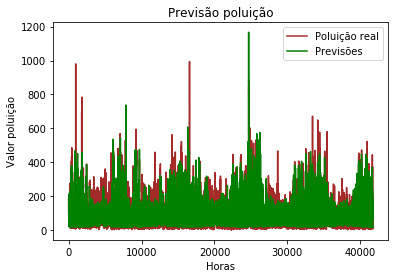

In [28]:
plt.plot(poluicao, color = 'brown', label = 'Poluição real')
plt.plot(previsoes, color = 'green', label = 'Previsões')
plt.title('Previsão poluição')
plt.xlabel('Horas')
plt.ylabel('Valor poluição')
plt.legend()
plt.show()